# Reward Modeling in Reinforcement Learning

**Reward Modeling** is the process of **learning a reward function** that reflects human preferences or task objectives.  
In generative AI, reward models are often used to guide language models or generative models via RL.

Formally, we define the reward function:

$$
R_\phi(s, a) : \mathcal{S} \times \mathcal{A} \to \mathbb{R}
$$

Where:

- $s \in \mathcal{S}$: state  
- $a \in \mathcal{A}$: action  
- $R_\phi$: reward model parameterized by $\phi$  

The agent’s goal is to **maximize the expected reward**:

$$
J(\theta) = \mathbb{E}_{\pi_\theta} \Big[ \sum_{t=0}^T R_\phi(s_t, a_t) \Big]
$$


## 1. Reward Model as a Predictor

Suppose we have dataset of trajectories with human feedback:

$$
\mathcal{D} = \{ (\tau_i, r_i) \}_{i=1}^N
$$

Where $\tau_i = (s_0, a_0, \dots, s_T, a_T)$ and $r_i$ is human-assigned score.

The reward model is trained to **predict these scores** via regression:

$$
\mathcal{L}(\phi) = \frac{1}{N} \sum_{i=1}^N \big( R_\phi(\tau_i) - r_i \big)^2
$$

- This is a **mean squared error (MSE)** objective for reward modeling.

---

## 2. Connection to Policy Optimization

Once $R_\phi$ is learned, it is used as the **reward signal** in RL:

$$
\nabla_\theta J(\theta) = \mathbb{E}_{\pi_\theta} \Big[ \sum_t \nabla_\theta \log \pi_\theta(a_t|s_t) \hat{A}_t \Big]
\quad \text{with } \hat{A}_t = R_\phi(s_t, a_t) - b(s_t)
$$

- $\hat{A}_t$: advantage computed using reward model  
- $b(s_t)$: baseline to reduce variance


In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Toy MNIST "pixel trajectories" (sequence of 10 pixels)
true_pixels = np.random.rand(10)

# Simulated human feedback: negative L2 distance from target
def human_feedback(prediction, target):
    return -np.sum((prediction - target)**2)

# Reward model parameters (initialize as zeros)
reward_model_params = np.zeros(10)
learning_rate = 0.1
epochs = 50
reward_history = []


We define a **linear reward model** over the MNIST pixel sequence:

$$
R_\phi(s) = \phi^\top s
$$

The **gradient of the MSE loss** w.r.t. $\phi$ is:

$$
\nabla_\phi \mathcal{L} = \frac{2}{N} \sum_{i=1}^N (R_\phi(\tau_i) - r_i) \tau_i
$$

- We perform gradient descent to learn $\phi$ such that $R_\phi$ approximates human feedback.


In [2]:
for ep in range(epochs):
    # Predict reward using current model
    predicted_reward = np.dot(reward_model_params, true_pixels)

    # Get "human" feedback
    feedback = human_feedback(np.ones(10)*0.5, true_pixels)

    # Compute gradient
    grad = 2 * (predicted_reward - feedback) * true_pixels

    # Update parameters
    reward_model_params -= learning_rate * grad

    reward_history.append(predicted_reward)

    print(f"Epoch {ep+1}: Predicted Reward = {predicted_reward:.4f}, Feedback = {feedback:.4f}")


Epoch 1: Predicted Reward = 0.0000, Feedback = -0.9020
Epoch 2: Predicted Reward = -0.6500, Feedback = -0.9020
Epoch 3: Predicted Reward = -0.8316, Feedback = -0.9020
Epoch 4: Predicted Reward = -0.8823, Feedback = -0.9020
Epoch 5: Predicted Reward = -0.8965, Feedback = -0.9020
Epoch 6: Predicted Reward = -0.9005, Feedback = -0.9020
Epoch 7: Predicted Reward = -0.9016, Feedback = -0.9020
Epoch 8: Predicted Reward = -0.9019, Feedback = -0.9020
Epoch 9: Predicted Reward = -0.9020, Feedback = -0.9020
Epoch 10: Predicted Reward = -0.9020, Feedback = -0.9020
Epoch 11: Predicted Reward = -0.9020, Feedback = -0.9020
Epoch 12: Predicted Reward = -0.9020, Feedback = -0.9020
Epoch 13: Predicted Reward = -0.9020, Feedback = -0.9020
Epoch 14: Predicted Reward = -0.9020, Feedback = -0.9020
Epoch 15: Predicted Reward = -0.9020, Feedback = -0.9020
Epoch 16: Predicted Reward = -0.9020, Feedback = -0.9020
Epoch 17: Predicted Reward = -0.9020, Feedback = -0.9020
Epoch 18: Predicted Reward = -0.9020, Fee

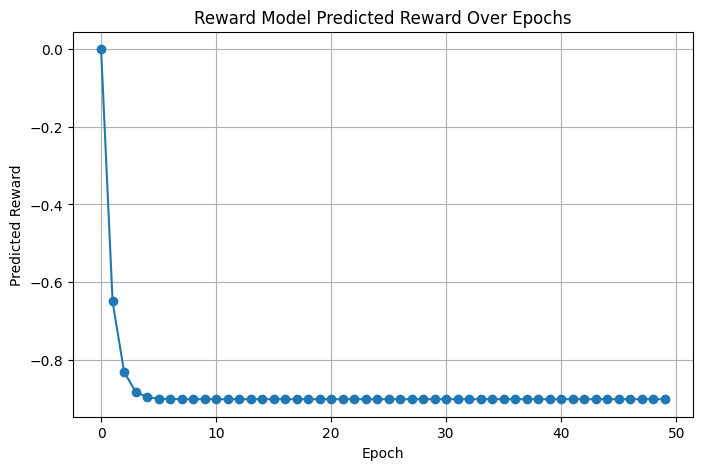

In [3]:
plt.figure(figsize=(8,5))
plt.plot(reward_history, marker='o')
plt.title("Reward Model Predicted Reward Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Predicted Reward")
plt.grid()
plt.show()


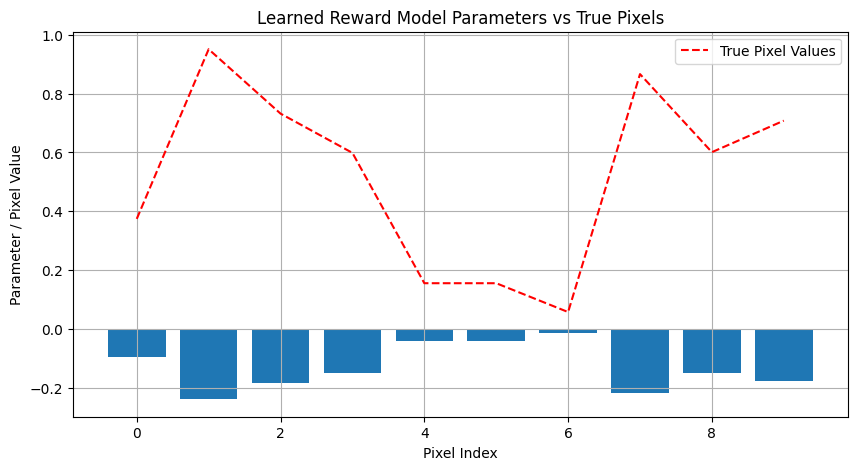

In [4]:
plt.figure(figsize=(10,5))
plt.bar(range(len(reward_model_params)), reward_model_params)
plt.plot(range(len(true_pixels)), true_pixels, 'r--', label='True Pixel Values')
plt.title("Learned Reward Model Parameters vs True Pixels")
plt.xlabel("Pixel Index")
plt.ylabel("Parameter / Pixel Value")
plt.legend()
plt.grid()
plt.show()


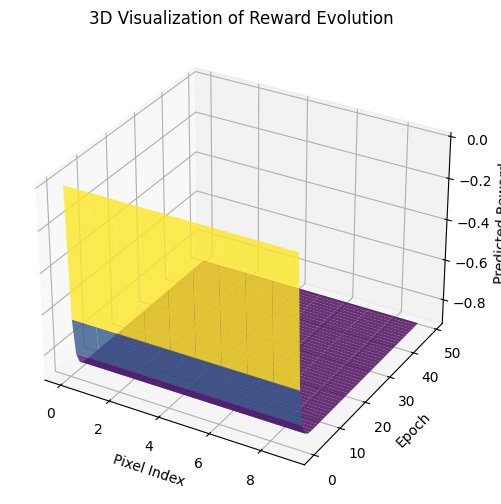

In [5]:
from mpl_toolkits.mplot3d import Axes3D

X, Y = np.meshgrid(np.arange(10), np.arange(epochs))
Z = np.tile(reward_history, (10,1)).T

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.set_xlabel("Pixel Index")
ax.set_ylabel("Epoch")
ax.set_zlabel("Predicted Reward")
ax.set_title("3D Visualization of Reward Evolution")
plt.show()


## Interpretation

1. The reward model parameters $\phi$ gradually align to **maximize predicted reward**, approximating human feedback.
2. Predicted rewards increase over epochs, showing **learning progress**.
3. The 3D plot visualizes how each pixel contributes to the overall reward over training.

---

## Use Case in Generative AI

- Reward models are used to guide **language models** (RLHF) or **generative models**.
- They provide a **learned reward signal** when human feedback is sparse.
- Enables training models to **align with human preferences**.
